In [1]:
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import MmCorpus
from gensim.corpora import Dictionary
from collections import Counter, defaultdict
from numpy.random import seed
import re
from metadata.metadata import ACL_metadata
from _topic_modeling.lda_loader import Loader
import _pickle as pkl
from metadata import Gender
from _storage.storage import FileDir
import matplotlib.pyplot as plt
import numpy as np
import logging
from os.path import join
import gensim 
fd = FileDir()
seed(1)
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
logging.root.level = logging.INFO

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

Using TensorFlow backend.
/afs/inf.ed.ac.uk/user/s14/s1427590/miniconda3/envs/mlp3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [5]:
with open(join(fd.models, "lda100topicsj.log"), "r") as f:
    perplexities = f.read()

In [13]:
import re
p = re.compile("\d+\.\d+ perplexity")
m = p.findall(perplexities)


In [16]:
perp = list(map(lambda x: float(x.split(" ")[0]), m))

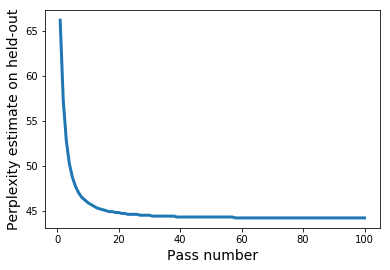

In [33]:
plt.plot(list(range(1,101)), perp[:100], linewidth=3)
plt.xlabel("Pass number", fontsize=14)
plt.ylabel("Perplexity estimate on held-out",fontsize=14)
plt.savefig("plots/ldatraining.pdf")
plt.show()

In [2]:
loader = Loader(100)
lda = loader.model
lda.id2word = loader.id2word
corpus = loader.corpus
dictionary = loader.dic
dids = loader.doc_ids
doc_topics = loader.doc_topics
topic_corresp = loader.topic_corresp
acl = ACL_metadata()
df = acl.modeling_df
#topic_corresp[15] = "StatisticalParsing"
gensimcm = CoherenceModel(model=lda, corpus=corpus, dictionary=dictionary, coherence='u_mass')
gensimcm.get_coherence()

loaded corpus index from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/acl_bow10.mm.index
initializing corpus reader from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/acl_bow10.mm
accepted corpus with 22278 documents, 63996 features, 10941296 non-zero entries
loading LdaModel object from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed310lda
loading expElogbeta from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed310lda.expElogbeta.npy with mmap=None
loading eta from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed310lda.eta.npy with mmap=None
setting ignored attribute id2word to None
setting ignored attribute dispatcher to None
setting ignored attribute state to None
loaded /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed310lda
loading LdaModel object from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed310lda.state
loaded /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldas

-1.4881249011951649

In [36]:
texts = fd.load_pickle("docs10")

In [37]:
loader = Loader(100)
lda = loader.model
lda.id2word = loader.id2word
corpus = loader.corpus
dictionary = loader.dic
dids = loader.doc_ids
doc_topics = loader.doc_topics
topic_corresp = loader.topic_corresp
acl = ACL_metadata()
df = acl.modeling_df
#topic_corresp[15] = "StatisticalParsing"
gensimcm = CoherenceModel(model=lda, corpus=corpus, dictionary=dictionary, coherence='c_uci', texts=texts)
gensimcm.get_coherence()

loaded corpus index from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/acl_bow10.mm.index
initializing corpus reader from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/acl_bow10.mm
accepted corpus with 22278 documents, 63996 features, 10941296 non-zero entries
loading LdaModel object from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed310lda
loading expElogbeta from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed310lda.expElogbeta.npy with mmap=None
loading eta from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed310lda.eta.npy with mmap=None
setting ignored attribute id2word to None
setting ignored attribute dispatcher to None
setting ignored attribute state to None
loaded /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed310lda
loading LdaModel object from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed310lda.state
loaded /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldas

90 batches submitted to accumulate stats from 5760 documents (11052337 virtual)
91 batches submitted to accumulate stats from 5824 documents (11117447 virtual)
92 batches submitted to accumulate stats from 5888 documents (11207199 virtual)
93 batches submitted to accumulate stats from 5952 documents (11272207 virtual)
94 batches submitted to accumulate stats from 6016 documents (11335472 virtual)
95 batches submitted to accumulate stats from 6080 documents (11419785 virtual)
96 batches submitted to accumulate stats from 6144 documents (11483119 virtual)
97 batches submitted to accumulate stats from 6208 documents (11602001 virtual)
98 batches submitted to accumulate stats from 6272 documents (11713939 virtual)
99 batches submitted to accumulate stats from 6336 documents (11802672 virtual)
100 batches submitted to accumulate stats from 6400 documents (11930019 virtual)
101 batches submitted to accumulate stats from 6464 documents (12039857 virtual)
102 batches submitted to accumulate st

191 batches submitted to accumulate stats from 12224 documents (24568075 virtual)
192 batches submitted to accumulate stats from 12288 documents (24649176 virtual)
193 batches submitted to accumulate stats from 12352 documents (24744425 virtual)
194 batches submitted to accumulate stats from 12416 documents (24849620 virtual)
195 batches submitted to accumulate stats from 12480 documents (24945386 virtual)
196 batches submitted to accumulate stats from 12544 documents (25088895 virtual)
197 batches submitted to accumulate stats from 12608 documents (25214811 virtual)
198 batches submitted to accumulate stats from 12672 documents (25346805 virtual)
199 batches submitted to accumulate stats from 12736 documents (25467930 virtual)
200 batches submitted to accumulate stats from 12800 documents (25577361 virtual)
201 batches submitted to accumulate stats from 12864 documents (25667403 virtual)
202 batches submitted to accumulate stats from 12928 documents (25786041 virtual)
203 batches subm

291 batches submitted to accumulate stats from 18624 documents (35889306 virtual)
292 batches submitted to accumulate stats from 18688 documents (36019404 virtual)
293 batches submitted to accumulate stats from 18752 documents (36147225 virtual)
294 batches submitted to accumulate stats from 18816 documents (36269204 virtual)
295 batches submitted to accumulate stats from 18880 documents (36401425 virtual)
296 batches submitted to accumulate stats from 18944 documents (36505203 virtual)
297 batches submitted to accumulate stats from 19008 documents (36626854 virtual)
298 batches submitted to accumulate stats from 19072 documents (36758947 virtual)
299 batches submitted to accumulate stats from 19136 documents (36890421 virtual)
300 batches submitted to accumulate stats from 19200 documents (37018828 virtual)
301 batches submitted to accumulate stats from 19264 documents (37121720 virtual)
302 batches submitted to accumulate stats from 19328 documents (37218693 virtual)
303 batches subm

1.1399256052354096

In [39]:
loader = Loader(50)
lda = loader.model
lda.id2word = loader.id2word
corpus = loader.corpus
dictionary = loader.dic
dids = loader.doc_ids
doc_topics = loader.doc_topics
topic_corresp = loader.topic_corresp
acl = ACL_metadata()
df = acl.modeling_df
topic_corresp[15] = "StatisticalParsing"
gensimcm = CoherenceModel(model=lda, corpus=corpus, dictionary=dictionary, coherence='c_uci', texts=texts)
gensimcm.get_coherence()

loaded corpus index from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/acl_bow10.mm.index
initializing corpus reader from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/acl_bow10.mm
accepted corpus with 22278 documents, 63996 features, 10941296 non-zero entries
loading LdaModel object from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed31050topicslda
loading expElogbeta from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed31050topicslda.expElogbeta.npy with mmap=None
loading eta from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed31050topicslda.eta.npy with mmap=None
setting ignored attribute id2word to None
setting ignored attribute dispatcher to None
setting ignored attribute state to None
loaded /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed31050topicslda
loading LdaModel object from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed31050topicslda.state
loaded /afs/inf.ed.ac.uk/use

90 batches submitted to accumulate stats from 5760 documents (11052337 virtual)
91 batches submitted to accumulate stats from 5824 documents (11117447 virtual)
92 batches submitted to accumulate stats from 5888 documents (11207199 virtual)
93 batches submitted to accumulate stats from 5952 documents (11272207 virtual)
94 batches submitted to accumulate stats from 6016 documents (11335472 virtual)
95 batches submitted to accumulate stats from 6080 documents (11419785 virtual)
96 batches submitted to accumulate stats from 6144 documents (11483119 virtual)
97 batches submitted to accumulate stats from 6208 documents (11602001 virtual)
98 batches submitted to accumulate stats from 6272 documents (11713939 virtual)
99 batches submitted to accumulate stats from 6336 documents (11802672 virtual)
100 batches submitted to accumulate stats from 6400 documents (11930019 virtual)
101 batches submitted to accumulate stats from 6464 documents (12039857 virtual)
102 batches submitted to accumulate st

191 batches submitted to accumulate stats from 12224 documents (24570199 virtual)
192 batches submitted to accumulate stats from 12288 documents (24652360 virtual)
193 batches submitted to accumulate stats from 12352 documents (24747296 virtual)
194 batches submitted to accumulate stats from 12416 documents (24850236 virtual)
195 batches submitted to accumulate stats from 12480 documents (24946729 virtual)
196 batches submitted to accumulate stats from 12544 documents (25090734 virtual)
197 batches submitted to accumulate stats from 12608 documents (25217050 virtual)
198 batches submitted to accumulate stats from 12672 documents (25348989 virtual)
199 batches submitted to accumulate stats from 12736 documents (25469791 virtual)
200 batches submitted to accumulate stats from 12800 documents (25578128 virtual)
201 batches submitted to accumulate stats from 12864 documents (25668158 virtual)
202 batches submitted to accumulate stats from 12928 documents (25789097 virtual)
203 batches subm

291 batches submitted to accumulate stats from 18624 documents (35893275 virtual)
292 batches submitted to accumulate stats from 18688 documents (36026416 virtual)
293 batches submitted to accumulate stats from 18752 documents (36149966 virtual)
294 batches submitted to accumulate stats from 18816 documents (36275206 virtual)
295 batches submitted to accumulate stats from 18880 documents (36406784 virtual)
296 batches submitted to accumulate stats from 18944 documents (36513026 virtual)
297 batches submitted to accumulate stats from 19008 documents (36633477 virtual)
298 batches submitted to accumulate stats from 19072 documents (36765901 virtual)
299 batches submitted to accumulate stats from 19136 documents (36894747 virtual)
300 batches submitted to accumulate stats from 19200 documents (37023221 virtual)
301 batches submitted to accumulate stats from 19264 documents (37126477 virtual)
302 batches submitted to accumulate stats from 19328 documents (37224111 virtual)
303 batches subm

1.0802404681077298

In [40]:
loader = Loader(75)
lda = loader.model
lda.id2word = loader.id2word
corpus = loader.corpus
dictionary = loader.dic
dids = loader.doc_ids
doc_topics = loader.doc_topics
topic_corresp = loader.topic_corresp
acl = ACL_metadata()
df = acl.modeling_df
topic_corresp[15] = "StatisticalParsing"
gensimcm = CoherenceModel(model=lda, corpus=corpus, dictionary=dictionary, coherence='c_uci', texts=texts)
gensimcm.get_coherence()

loaded corpus index from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/acl_bow10.mm.index
initializing corpus reader from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/acl_bow10.mm
accepted corpus with 22278 documents, 63996 features, 10941296 non-zero entries
loading LdaModel object from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed31075topicslda
loading expElogbeta from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed31075topicslda.expElogbeta.npy with mmap=None
loading eta from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed31075topicslda.eta.npy with mmap=None
setting ignored attribute dispatcher to None
setting ignored attribute id2word to None
setting ignored attribute state to None
loaded /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed31075topicslda
loading LdaModel object from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed31075topicslda.state
loaded /afs/inf.ed.ac.uk/use

90 batches submitted to accumulate stats from 5760 documents (11052337 virtual)
91 batches submitted to accumulate stats from 5824 documents (11117447 virtual)
92 batches submitted to accumulate stats from 5888 documents (11207199 virtual)
93 batches submitted to accumulate stats from 5952 documents (11272207 virtual)
94 batches submitted to accumulate stats from 6016 documents (11335472 virtual)
95 batches submitted to accumulate stats from 6080 documents (11419785 virtual)
96 batches submitted to accumulate stats from 6144 documents (11483119 virtual)
97 batches submitted to accumulate stats from 6208 documents (11602001 virtual)
98 batches submitted to accumulate stats from 6272 documents (11713939 virtual)
99 batches submitted to accumulate stats from 6336 documents (11802672 virtual)
100 batches submitted to accumulate stats from 6400 documents (11930019 virtual)
101 batches submitted to accumulate stats from 6464 documents (12039857 virtual)
102 batches submitted to accumulate st

191 batches submitted to accumulate stats from 12224 documents (24570199 virtual)
192 batches submitted to accumulate stats from 12288 documents (24652360 virtual)
193 batches submitted to accumulate stats from 12352 documents (24747296 virtual)
194 batches submitted to accumulate stats from 12416 documents (24850236 virtual)
195 batches submitted to accumulate stats from 12480 documents (24946729 virtual)
196 batches submitted to accumulate stats from 12544 documents (25090734 virtual)
197 batches submitted to accumulate stats from 12608 documents (25217050 virtual)
198 batches submitted to accumulate stats from 12672 documents (25348989 virtual)
199 batches submitted to accumulate stats from 12736 documents (25469791 virtual)
200 batches submitted to accumulate stats from 12800 documents (25578128 virtual)
201 batches submitted to accumulate stats from 12864 documents (25668158 virtual)
202 batches submitted to accumulate stats from 12928 documents (25789097 virtual)
203 batches subm

291 batches submitted to accumulate stats from 18624 documents (35891961 virtual)
292 batches submitted to accumulate stats from 18688 documents (36024051 virtual)
293 batches submitted to accumulate stats from 18752 documents (36148167 virtual)
294 batches submitted to accumulate stats from 18816 documents (36272643 virtual)
295 batches submitted to accumulate stats from 18880 documents (36405058 virtual)
296 batches submitted to accumulate stats from 18944 documents (36510457 virtual)
297 batches submitted to accumulate stats from 19008 documents (36631100 virtual)
298 batches submitted to accumulate stats from 19072 documents (36764333 virtual)
299 batches submitted to accumulate stats from 19136 documents (36893545 virtual)
300 batches submitted to accumulate stats from 19200 documents (37023200 virtual)
301 batches submitted to accumulate stats from 19264 documents (37124105 virtual)
302 batches submitted to accumulate stats from 19328 documents (37222300 virtual)
303 batches subm

1.1992003282386108